<a href="https://colab.research.google.com/github/jjyjung/algorithm/blob/gh-pages/ch5_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ch.5. BST(Binary Search Tree: 이진 탐색 트리)**

* Python Dictionary는 key:value 쌍을 저장하고 있으며, key를 통한 빠르고 효율적인 탐색이 필요함

In [1]:
dict = {30: ('Kim', 'kim@khu.ac.kr', '010-201-1234'),
  20: ('Lee', 'lee@khu.ac.kr', '010-201-1235'),
  25: ('Park', 'park@khu.ac.kr', '010-201-1236'),
  40: ('Choi', 'choi@khu.ac.kr', '010-201-1238'),
  10: ('Jung', 'jung@khu.ac.kr', '010-201-1239'),
  35: ('Kang', 'kang@khu.ac.kr', '010-201-1239')
}

dict[35]

('Kang', 'kang@khu.ac.kr', '010-201-1239')

* BST를 이용하면, 일반적인 Table에 대해서도 Dictionary와 같이 빠르고 효율적인 탐색을 구현할 수 있음 (평균 복잡도 O(log n))

In [2]:
# columns: id, name, email, phone
students = [(30, 'Kim', 'kim@khu.ac.kr', '010-201-1234'),
  (20, 'Lee', 'lee@khu.ac.kr', '010-201-1235'),
  (25, 'Park', 'park@khu.ac.kr', '010-201-1236'),
  (40, 'Choi', 'choi@khu.ac.kr', '010-201-1238'),
  (10, 'Jung', 'jung@khu.ac.kr', '010-201-1239'),
  (35, 'Kang', 'kang@khu.ac.kr', '010-201-1239')
]

print(students[2])

# students['id'=25] <= 순차적 검색만 가능함 (record를 하나씩 확인해야 하므로 복잡도 O(n))
for stu in students:
  if stu[0] == 25:
    print(stu)

(25, 'Park', 'park@khu.ac.kr', '010-201-1236')
(25, 'Park', 'park@khu.ac.kr', '010-201-1236')


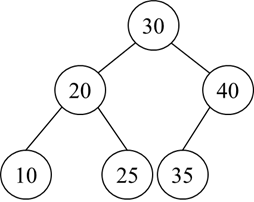

**Tree Node의 클래스 구현 (참고하기)**

In [3]:
class Node():
  def __init__(self, key):
    self.key = key      # node의 key값
    self.left = None    # node의 left child
    self.right = None   # node의 right child
    self.parent = None  # node의 parent

**BST에서의 삽입 구현**

In [4]:
def treeInsert(t, key):
    # 새로운 노드 생성
    z = Node(key)
    
    # y는 현재 노드의 부모를 추적하기 위한 변수
    y = None
    # x는 트리를 순회하기 위한 변수
    x = t
    
    # 트리를 순회하면서 삽입할 위치를 찾는다.
    while x is not None:
        y = x
        if z.key < x.key:
            x = x.left
        else:
            x = x.right
    
    # y는 z의 부모가 됨
    z.parent = y
    
    # y가 None이면 트리가 비어있는 상태
    if y is None:
        t = z
    # z의 키가 y의 키보다 작으면 왼쪽 자식으로 삽입
    elif z.key < y.key:
        y.left = z
    # z의 키가 y의 키보다 크면 오른쪽 자식으로 삽입
    else:
        y.right = z
    
    return t

keys = [30, 20, 25, 40, 10, 35]
t = None
for key in keys:
    t = treeInsert(t, key)

**Tree 내용 확인 (참고하기)**

In [5]:
import queue

# BFS(Breadth-First Search)을 단순화한 Tree 탐색 구현 함수
def showTree(t):
    if t == None:
      return

    Q = queue.Queue()             # 파이썬 큐 모듈의 큐 객체 생성
    Q.put(t)                      # 시작 노드 s를 Queue에 추가
    while not Q.empty():          # 큐에 (자식을 찾을) 항목이 남아있는 동안
        u = Q.get()               # 큐의 맨 앞에서 정점 u를 하나 추출하여
        print(u.key, end=" - ")   # 자신의 key 값 출력하고
        if u.left != None:        # 왼쪽 자식이 있으면 key 값 출력하고
          Q.put(u.left)
          print(u.left.key, end="")
        print("", end=" - ")      # 오른쪽 자식이 있으면 key 값 출력함
        if u.right != None:
          Q.put(u.right)
          print(u.right.key, end="")
        print()

showTree(t)

30 - 20 - 40
20 - 10 - 25
40 - 35 - 
10 -  - 
25 -  - 
35 -  - 


**BST에서의 검색 구현**

In [6]:
def treeSearch(t, key):
    # 현재 노드 t가 None이 아니고, t의 키 값이 찾고자 하는 key 값과 다른 동안 반복
    while t is not None and key != t.key:
        # 찾고자 하는 key 값이 현재 노드의 키 값보다 작으면 왼쪽 자식으로 이동
        if key < t.key:
            t = t.left
        # 찾고자 하는 key 값이 현재 노드의 키 값보다 크면 오른쪽 자식으로 이동
        else:
            t = t.right
    return t

key = 30    # key=30 이 존재함
n = treeSearch(t, key)
print(n.key, n.left.key, n.right.key)

key = 50    # key=50 은 존재하지 않음
n = treeSearch(t, key)
if n != None:   # 예외처리
    print(n.key, n.left.key, n.right.key)
else:
    print("key %s는 없음!" % key)

30 20 40
key 50는 없음!


**BST에서의 삭제 구현**

In [7]:
def treeMinimum(x):
    while x.left is not None:
        x = x.left
    return x

def treeDelete(t, r, p):
    # r이 자식이 없는 노드인 경우
    if r.left is None and r.right is None:
        if p is None:
            t = None
        elif p.left == r:
            p.left = None
        else:
            p.right = None
    # r이 오른쪽 자식만 가지는 경우
    elif r.left is None:
        if p is None:
            t = r.right
        elif p.left == r:
            p.left = r.right
        else:
            p.right = r.right
        r.right.parent = p
    # r이 왼쪽 자식만 가지는 경우
    elif r.right is None:
        if p is None:
            t = r.left
        elif p.left == r:
            p.left = r.left
        else:
            p.right = r.left
        r.left.parent = p
    # r이 두 개의 자식을 모두 가지는 경우
    else:
        y = treeMinimum(r.right)
        r.key = y.key
        t = treeDelete(t, y, y.parent)
    return t

def deleteNode(r):
    if r is None:
        return None
    p = r.parent
    t = None if p is None else (p.left if p.left == r else p.right)
    return treeDelete(t, r, p)

showTree(t); print()

keys = [40, 20, 35, 30]   # 순서대로 삭제할 노드
for key in keys:
    r = treeSearch(t, key)  # 삭제할 key값의 노드를 찾고
    if r != None:
        p = r.parent          # 부모 노드도 찾아서
        t = treeDelete(t, r, p) # 노드 삭제
    showTree(t); print()


30 - 20 - 40
20 - 10 - 25
40 - 35 - 
10 -  - 
25 -  - 
35 -  - 

30 - 20 - 35
20 - 10 - 25
35 -  - 
10 -  - 
25 -  - 

30 - 25 - 35
25 - 10 - 
35 -  - 
10 -  - 

30 - 25 - 
25 - 10 - 
10 -  - 

25 - 10 - 
10 -  - 



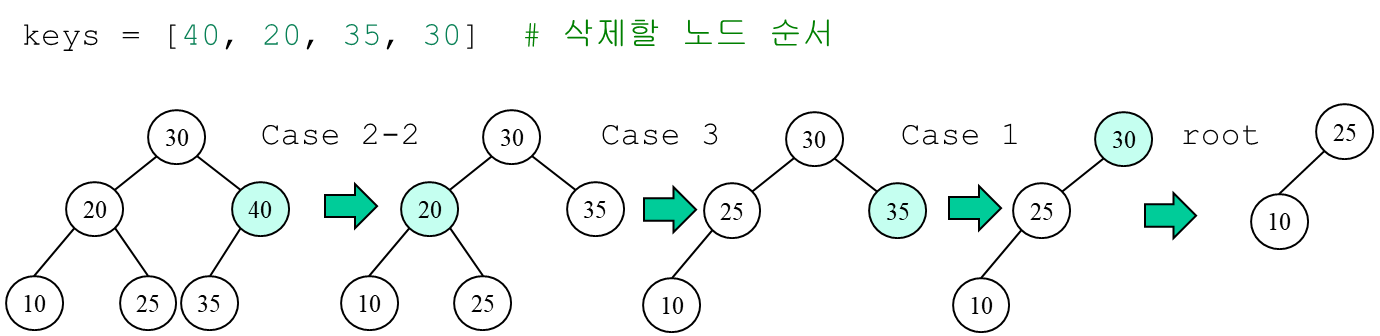

## **데이터 탐색으로 확장하기 (참고하기)**

In [8]:
class Node():
  def __init__(self, key):
    self.key = key
    self.left = None
    self.right = None
    self.parent = None
    self.index = None  # 실제 Data를 연결하기 위한 index를 추가함

In [9]:
def treeInsert(t, key, index):
    # 새로운 노드 생성
    z = Node(key)
    z.index = index  # 인덱스 설정
    
    # y는 현재 노드의 부모를 추적하기 위한 변수
    y = None
    # x는 트리를 순회하기 위한 변수
    x = t
    
    # 트리를 순회하면서 삽입할 위치를 찾는다.
    while x is not None:
        y = x
        if z.key < x.key:
            x = x.left
        else:
            x = x.right
    
    # y는 z의 부모가 됨
    z.parent = y
    
    # y가 None이면 트리가 비어있는 상태
    if y is None:
        t = z
    # z의 키가 y의 키보다 작으면 왼쪽 자식으로 삽입
    elif z.key < y.key:
        y.left = z
    # z의 키가 y의 키보다 크면 오른쪽 자식으로 삽입
    else:
        y.right = z
    
    return t

keys = [30, 20, 25, 40, 10, 35]
t = None
for i, key in enumerate(keys):
    t = treeInsert(t, key, i)

z = None
for i, stu in enumerate(students):
    z = treeInsert(z, stu[1], i)


In [10]:
showTree(t)    # Student id를 key로 하는 BST
showTree(z)    # Student name을 key로 하는 BST

30 - 20 - 40
20 - 10 - 25
40 - 35 - 
10 -  - 
25 -  - 
35 -  - 
Kim - Choi - Lee
Choi -  - Jung
Lee -  - Park
Jung -  - Kang
Park -  - 
Kang -  - 


* Name을 key로 생성된 BST는 다른 구조임을 알 수 있다.

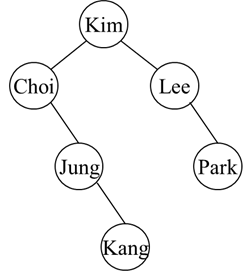

* 이제 id 뿐만 아니라 name으로도 검색할 수 있다.

In [11]:
# student id로 검색하는 경우
n = treeSearch(t, 30)
print(students[n.index])

# student name으로 검색하는 경우
n = treeSearch(z, 'Jung')
print(students[n.index])

(30, 'Kim', 'kim@khu.ac.kr', '010-201-1234')
(10, 'Jung', 'jung@khu.ac.kr', '010-201-1239')
